In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, accuracy_score

# Load cleaned datasets
tuesday = pd.read_csv('tuesday_plus_cleaned.csv')
wednesday = pd.read_csv('wednesday_plus_cleaned.csv')
thursday = pd.read_csv('thursday_plus_cleaned.csv')
friday = pd.read_csv('friday_plus_cleaned.csv')

# Combine all days into one DataFrame
combined_df = pd.concat([tuesday, wednesday, thursday, friday], ignore_index=True)

# Columns to retain
selected_columns = [
    'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
    'Total Fwd Packet', 'Total Bwd packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd IAT Mean', 'Fwd IAT Std',
    'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Header Length', 'Bwd Header Length',
    'Label'
]

# Drop all other columns
combined_df = combined_df[selected_columns]

# Drop missing values
combined_df.dropna(inplace=True)

# Normalize labels to uppercase for consistent matching
combined_df['Label'] = combined_df['Label'].str.upper()

# Convert to binary labels: 'Benign' if exactly 'BENIGN', else 'Attack'
combined_df['Label'] = combined_df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

# Check label distribution
print("Label distribution:\n", combined_df['Label'].value_counts())

# Separate features and target
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

# Fake group IDs if actual flow/session ID is not present
groups = np.arange(len(X))

# Prevent data leakage using GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Check train/test label distribution
print("Train label counts:\n", y_train.value_counts())
print("Test label counts:\n", y_test.value_counts())

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
feature_ranking = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
print("\nTop Features Used by the Model:")
for name, score in feature_ranking[:10]:
    print(f"{name}: {score:.4f}")



Label distribution:
 Label
Benign    1206738
Attack     514253
Name: count, dtype: int64
Train label counts:
 Label
Benign    844723
Attack    359970
Name: count, dtype: int64
Test label counts:
 Label
Benign    362015
Attack    154283
Name: count, dtype: int64
Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    154283
      Benign       1.00      1.00      1.00    362015

    accuracy                           1.00    516298
   macro avg       1.00      1.00      1.00    516298
weighted avg       1.00      1.00      1.00    516298


Top Features Used by the Model:
Bwd Packet Length Max: 0.1763
Fwd Packet Length Max: 0.1486
Dst Port: 0.0761
Flow Duration: 0.0750
Fwd Packet Length Min: 0.0672
Total Bwd packets: 0.0610
Protocol: 0.0562
Total Fwd Packet: 0.0509
Bwd IAT Mean: 0.0484
Flow Packets/s: 0.0405


Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    154283
      Benign       1.00      1.00      1.00    362015

    accuracy                           1.00    516298
   macro avg       1.00      1.00      1.00    516298
weighted avg       1.00      1.00      1.00    516298



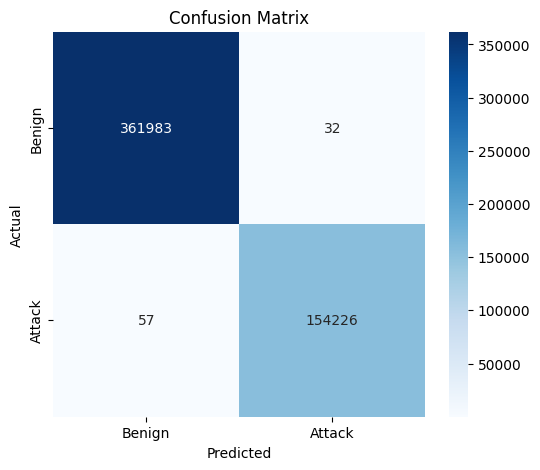

/var/folders/y5/6j_khfx9703159vgp4qxsqzw0000gn/T/ipykernel_41419/1715702742.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_scores, y=feat_names, palette='viridis')


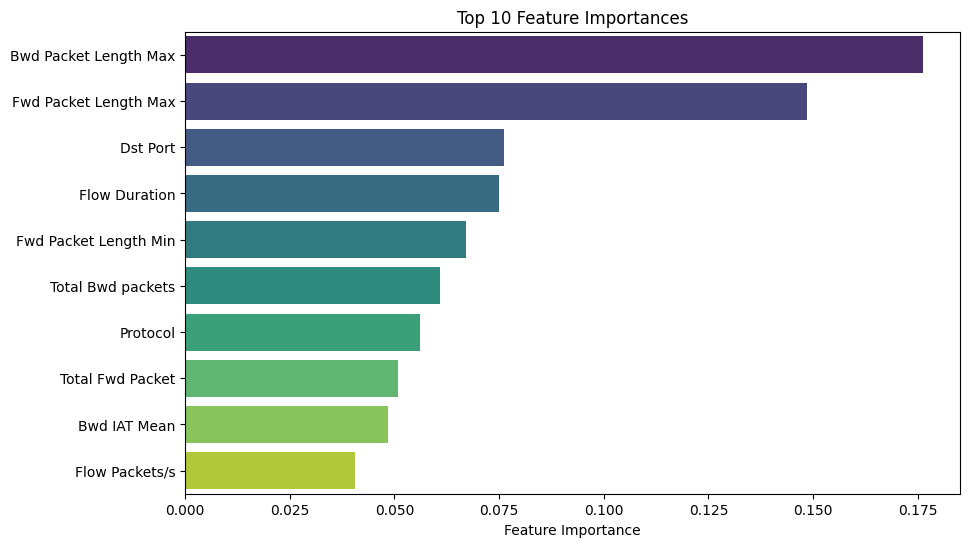

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
tuesday = pd.read_csv('tuesday_plus_cleaned.csv')
wednesday = pd.read_csv('wednesday_plus_cleaned.csv')
thursday = pd.read_csv('thursday_plus_cleaned.csv')
friday = pd.read_csv('friday_plus_cleaned.csv')

# Combine all days into one DataFrame
combined_df = pd.concat([tuesday, wednesday, thursday, friday], ignore_index=True)

# Columns to retain
selected_columns = [
    'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
    'Total Fwd Packet', 'Total Bwd packets', 'Fwd Packet Length Max',
    'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
    'Flow Bytes/s', 'Flow Packets/s', 'Fwd IAT Mean', 'Fwd IAT Std',
    'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Header Length', 'Bwd Header Length',
    'Label'
]

# Drop all other columns
combined_df = combined_df[selected_columns]

# Drop missing values
combined_df.dropna(inplace=True)

# Normalize labels to uppercase for consistent matching
combined_df['Label'] = combined_df['Label'].str.upper()

# Convert to binary labels: 'Benign' if exactly 'BENIGN', else 'Attack'
combined_df['Label'] = combined_df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

# Separate features and target
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

# Fake group IDs if actual flow/session ID is not present
groups = np.arange(len(X))

# Prevent data leakage using GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Attack'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
importances = model.feature_importances_
feature_ranking = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Prepare data for plot
feat_names = [name for name, _ in feature_ranking[:10]]
feat_scores = [score for _, score in feature_ranking[:10]]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_scores, y=feat_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    154283
      Benign       1.00      1.00      1.00    362015

    accuracy                           1.00    516298
   macro avg       1.00      1.00      1.00    516298
weighted avg       1.00      1.00      1.00    516298



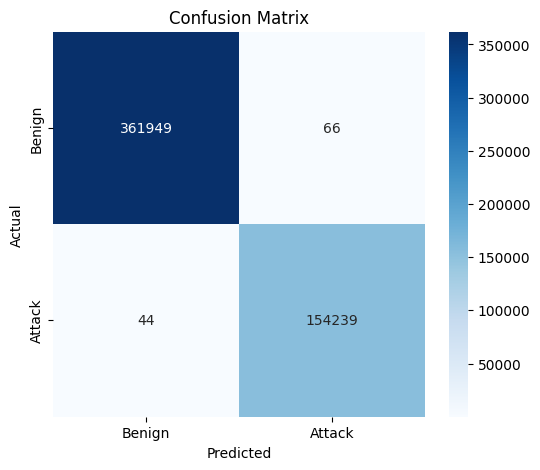

/var/folders/y5/6j_khfx9703159vgp4qxsqzw0000gn/T/ipykernel_41419/3333886101.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_scores, y=feat_names, palette='viridis')


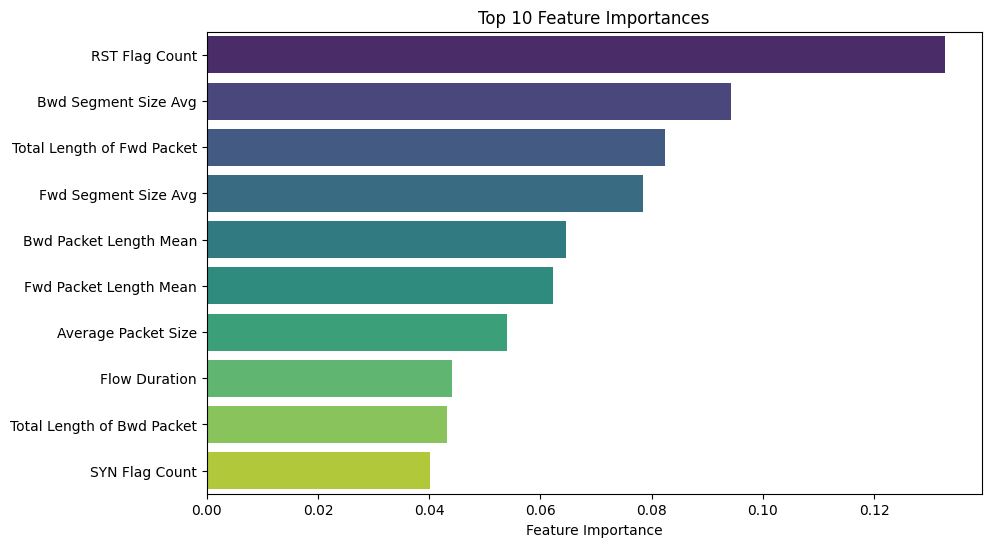

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned datasets
tuesday = pd.read_csv('tuesday_plus_cleaned.csv')
wednesday = pd.read_csv('wednesday_plus_cleaned.csv')
thursday = pd.read_csv('thursday_plus_cleaned.csv')
friday = pd.read_csv('friday_plus_cleaned.csv')

# Combine all days into one DataFrame
combined_df = pd.concat([tuesday, wednesday, thursday, friday], ignore_index=True)


# Columns to retain
selected_columns = [
    'Flow Duration',
    'Total Fwd Packet',
    'Total Bwd packets',
    'Total Length of Fwd Packet',
    'Total Length of Bwd Packet',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Flow IAT Mean',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'FIN Flag Count',
    'SYN Flag Count',
    'RST Flag Count',
    'PSH Flag Count',
    'ACK Flag Count',
    'URG Flag Count',
    'FWD Init Win Bytes',
    'Bwd Init Win Bytes',
    'Down/Up Ratio',
    'Average Packet Size',
    'Fwd Segment Size Avg',
    'Bwd Segment Size Avg',
    'Protocol',
    'Src Port',
    'Dst Port',
    'Label'
]

# Drop all other columns
combined_df = combined_df[selected_columns]

# Drop missing values
combined_df.dropna(inplace=True)

# Normalize labels to uppercase for consistent matching
combined_df['Label'] = combined_df['Label'].str.upper()

# Convert to binary labels: 'Benign' if exactly 'BENIGN', else 'Attack'
combined_df['Label'] = combined_df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

# Separate features and target
X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

# Fake group IDs if actual flow/session ID is not present
groups = np.arange(len(X))

# Prevent data leakage using GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Attack'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature importance plot
importances = model.feature_importances_
feature_ranking = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Prepare data for plot
feat_names = [name for name, _ in feature_ranking[:10]]
feat_scores = [score for _, score in feature_ranking[:10]]

plt.figure(figsize=(10,6))
sns.barplot(x=feat_scores, y=feat_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()

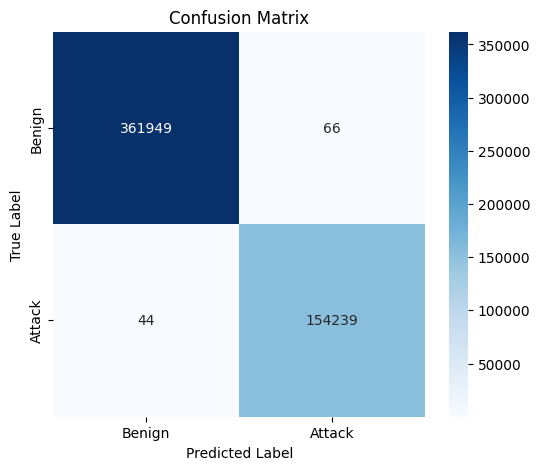

Confusion Matrix:
[[361949     66]
 [    44 154239]]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Attack'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)
